# Import Libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [5]:
df_stock = pd.read_csv('ETH-USD.csv')
df_stock.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2017-11-09,2017,11,9,Thursday,45,2017-45,308.64,329.45,307.06,320.88,893249984,320.88,0.000000,320.880000,320.880000
1,2017-11-10,2017,11,10,Friday,45,2017-45,320.67,324.72,294.54,299.25,885985984,299.25,-0.067411,310.065000,310.065000
2,2017-11-11,2017,11,11,Saturday,45,2017-45,298.59,319.45,298.19,314.68,842300992,314.68,0.051555,311.603333,311.603333
3,2017-11-12,2017,11,12,Sunday,46,2017-46,314.69,319.15,298.51,307.91,1613479936,307.91,-0.021523,310.680000,310.680000
4,2017-11-13,2017,11,13,Monday,46,2017-46,307.02,328.42,307.02,316.72,1041889984,316.72,0.028606,311.888000,311.888000


In [6]:
df_weekly = pd.read_csv('ETH-USD_weekly_return_volatility.csv')
df_weekly.head()

,Year,Week_Number,mean_return,volatility,label
0,2017,45,-0.528333,5.966071,NaN
1,2017,46,1.477000,3.277433,NaN
2,2017,47,4.435143,6.128955,NaN
3,2017,48,0.016429,4.824342,NaN
4,2017,49,0.379857,4.076044,NaN


# Train Decision Tree Classifier on Year 1 (2020)

In [8]:
df_2020 = df_weekly[df_weekly.Year == 2020]
X = df_2020[['mean_return', 'volatility']]
Label = df_2020['label']

le = LabelEncoder ()
Y = le.fit_transform(Label.values)

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, Y)

# Predict labels of year 2 (2021)

In [9]:
df_2021 = df_weekly[df_weekly.Year == 2021]
X_test, y_test = df_2021[['mean_return', 'volatility']], df_2021['label']

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1])

# Confusion Matrix

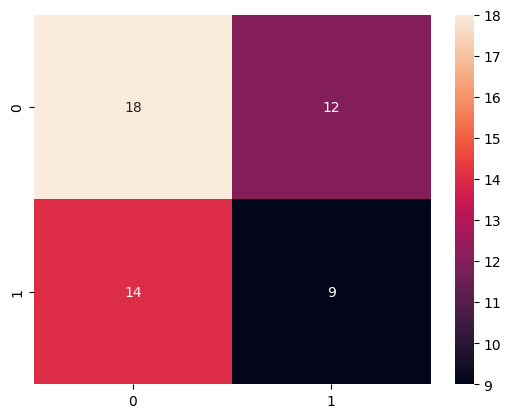

In [10]:
y = le.transform(y_test)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# TPR and TNR

In [11]:
tn, fp, fn, tp = cm.ravel()
TPR = tp / (tp + tn)
TNR = tn / (fn + tn)
print(f"TPR = {TPR} and TNR = {TNR}.")

TPR = 0.3333333333333333 and TNR = 0.5625.
